In [1]:
#Portfolio Project 4
#Charlie Helenbrook
#28-Jan-2025
#This project aims to analyze the trends for endagered species



In [2]:
#Importing modules I need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [3]:
df_obs = pd.read_csv('observations.csv')
df_spInfo = pd.read_csv('species_info.csv')
print(df_obs.head())
print(df_obs.dtypes)


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
scientific_name    object
park_name          object
observations        int64
dtype: object


In [4]:
#print(df_spInfo.head())
print(df_spInfo.dtypes)

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [14]:
#Merging the two dataframes together on scientific name
merged_data = df_obs.merge(df_spInfo, on = 'scientific_name')
#print(merged_data.nunique())
print(merged_data.describe(include = 'all'))
#Here's what I'm thinking.  I need to remove any of them that are duplicates.  
#Each National Park should only have one observation per species.  
#If I'm looking at endagered species it might be better to have a data set where I am just looking at that
#In Recovery < Species of Concern < Threatened < Endangered
print(merged_data.head(30))

         scientific_name                            park_name  observations  \
count              25632                                25632  25632.000000   
unique              5541                                    4           NaN   
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN   
freq                  36                                 6408           NaN   
mean                 NaN                                  NaN    142.214693   
std                  NaN                                  NaN     69.912475   
min                  NaN                                  NaN      9.000000   
25%                  NaN                                  NaN     86.000000   
50%                  NaN                                  NaN    124.000000   
75%                  NaN                                  NaN    195.000000   
max                  NaN                                  NaN    321.000000   

              category   common_names conservation_

In [16]:
print(merged_data['conservation_status'].unique())
#Checking for duplicates
duplicates = merged_data.duplicated(keep = False)
print("Duplicate Rows:\n", merged_data[duplicates])
merged_data_cleaned = merged_data.drop_duplicates()
duplicates_test = merged_data_cleaned.duplicated(keep = False)


[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']
Duplicate Rows:
             scientific_name                            park_name  \
1060   Monotropa hypopithys  Great Smoky Mountains National Park   
1061   Monotropa hypopithys  Great Smoky Mountains National Park   
1070   Monotropa hypopithys  Great Smoky Mountains National Park   
1071   Monotropa hypopithys  Great Smoky Mountains National Park   
1844         Plantago major  Great Smoky Mountains National Park   
...                     ...                                  ...   
19701         Poa compressa  Great Smoky Mountains National Park   
22778  Potentilla norvegica               Yosemite National Park   
22779  Potentilla norvegica               Yosemite National Park   
22784  Potentilla norvegica               Yosemite National Park   
22785  Potentilla norvegica               Yosemite National Park   

       observations        category                            common_names  \
1060             73 

In [18]:
print("Duplicate Rows:\n", merged_data_cleaned[duplicates_test])

Duplicate Rows:
 Empty DataFrame
Columns: [scientific_name, park_name, observations, category, common_names, conservation_status]
Index: []


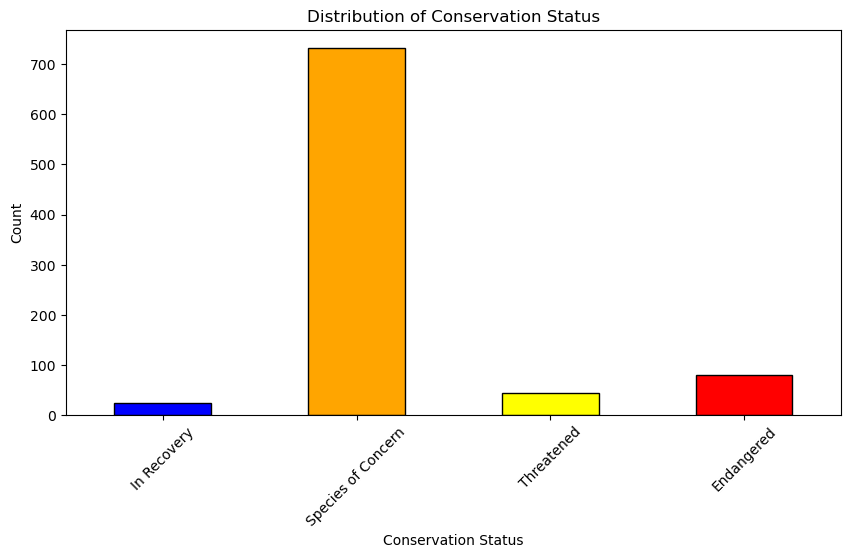

In [31]:
# Remove rows where conservation_status is NaN (No Status)
filtered_data = merged_data_cleaned.dropna(subset=['conservation_status'])

# Define the desired order of conservation statuses
status_order = ["In Recovery", "Species of Concern", "Threatened", "Endangered"]

# Count the distribution of conservation statuses
conservation_counts = filtered_data['conservation_status'].value_counts()

# Reorder the counts according to the desired order
conservation_counts = conservation_counts.reindex(status_order, fill_value=0)

# Plot the distribution
plt.figure(figsize=(10, 5))
conservation_counts.plot(kind='bar', color=['blue', 'orange', 'yellow', 'red'], edgecolor='black')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Distribution of Conservation Status')
plt.xticks(rotation=45)
# Save the plot as a file
plt.savefig("conservation_status_distribution.png", dpi=300, bbox_inches='tight')  # PNG format

plt.show()

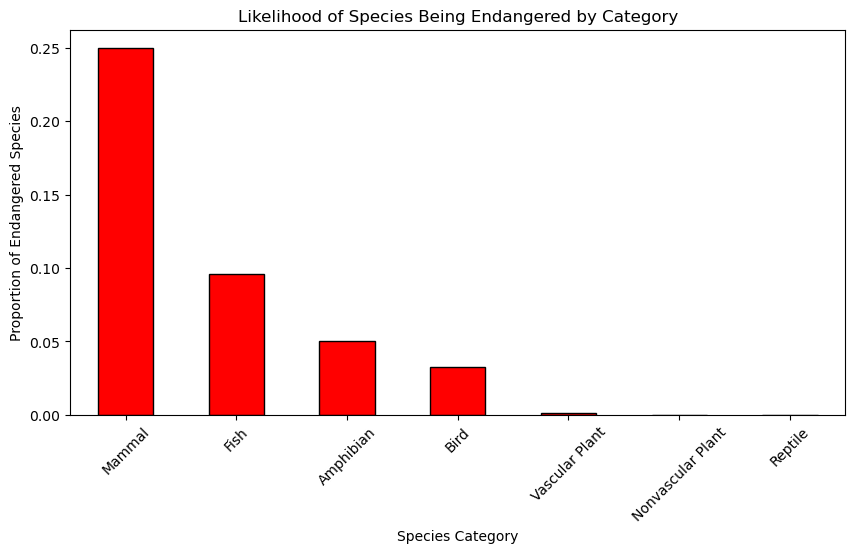

                   Endangered  Total  Endangered_Proportion
category                                                   
Amphibian                 4.0     79               0.050633
Bird                     16.0    488               0.032787
Fish                     12.0    125               0.096000
Mammal                   44.0    176               0.250000
Nonvascular Plant         0.0    333               0.000000
Reptile                   0.0     78               0.000000
Vascular Plant            4.0   4262               0.000939


In [32]:
# Count the total number of unique species per category, including those with NA conservation_status
total_counts = merged_data_cleaned.groupby('category')['scientific_name'].nunique()

# Count the number of Endangered species per category (ignoring NA values)
endangered_counts = merged_data_cleaned[merged_data_cleaned['conservation_status'] == 'Endangered'].groupby('category').size()

# Combine the counts into a single DataFrame
category_counts = pd.DataFrame({'Endangered': endangered_counts, 'Total': total_counts})

# Fill missing values with 0 (in case some categories have no endangered species)
category_counts.fillna(0, inplace=True)

# Calculate the proportion of Endangered species
category_counts['Endangered_Proportion'] = category_counts['Endangered'] / category_counts['Total']

# Plot the proportion of endangered species per category
plt.figure(figsize=(10, 5))
category_counts['Endangered_Proportion'].sort_values(ascending=False).plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Species Category')
plt.ylabel('Proportion of Endangered Species')
plt.title('Likelihood of Species Being Endangered by Category')
plt.xticks(rotation=45)
plt.savefig("likelihood_of_being_endangered.png", dpi=300, bbox_inches='tight')  # PNG format
plt.show()

# Print the table for reference
print(category_counts[['Endangered', 'Total', 'Endangered_Proportion']])


In [33]:
# Calculate the total number of unique species
total_species = merged_data_cleaned['scientific_name'].nunique()

# Print the result
# Count the total number of unique species
total_species = merged_data_cleaned['scientific_name'].nunique()

# Count the number of unique species that have a conservation status (excluding NaN)
species_with_status = merged_data_cleaned.dropna(subset=['conservation_status'])['scientific_name'].nunique()

# Print results
print(f"Total unique species: {total_species}")
print(f"Species with a conservation status: {species_with_status}")
print(f"Species with healthy population levels: {total_species - species_with_status}")

Total unique species: 5541
Species with a conservation status: 179
Species with healthy population levels: 5362
